In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)

In [7]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [8]:
X_train.head(1)

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0


In [9]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [14]:
X_train['Age'].dropna().sample(1).values

array([2.])

In [11]:
X_train['Age'].isnull().sum()

148

In [16]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([47.  , 61.  , 33.  , 31.  , 34.  , 18.  , 48.  , 31.  , 22.  ,
       49.  ,  4.  , 35.  , 22.  , 28.  , 23.  , 35.  , 61.  , 28.5 ,
       29.  , 34.  , 24.  , 28.5 , 47.  , 33.  ,  9.  , 24.  , 28.  ,
       25.  , 54.  , 27.  , 30.  , 48.  , 50.  ,  4.  , 27.  , 21.  ,
       20.  , 29.  , 22.  , 29.  ,  3.  , 28.  , 18.  , 42.  , 31.  ,
       54.  , 23.  , 16.  , 54.  , 21.  , 40.  , 34.  , 41.  , 18.  ,
        9.  , 52.  , 34.  , 18.  , 25.  , 16.  , 28.  , 66.  , 40.  ,
       62.  , 27.  , 29.  , 18.  , 21.  , 24.  , 22.  , 23.  , 24.  ,
       22.  , 24.  , 22.  , 70.5 , 30.  , 30.  , 59.  , 51.  , 39.  ,
       56.  , 15.  , 44.  , 45.5 , 19.  , 65.  ,  0.75,  3.  , 42.  ,
       42.  , 20.  , 34.  , 70.  , 32.  , 23.  , 26.  , 30.  , 47.  ,
       59.  , 28.  , 35.  , 45.  , 30.  , 30.  , 52.  , 26.  , 37.  ,
       30.  , 27.  , 27.  , 16.  , 33.  , 51.  ,  9.  , 42.  , 23.  ,
       44.  , 32.  , 34.  , 36.  ,  6.  , 38.  , 29.  , 32.  , 34.  ,
       17.  , 62.  ,

In [15]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20524\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


In [17]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,48.0
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


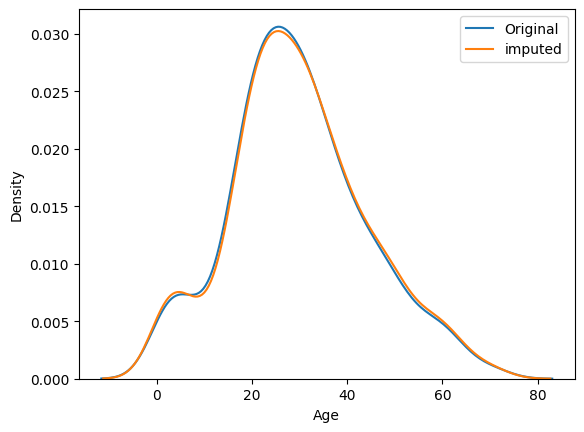

In [24]:
# sns.distplot(X_train['Age'],label='Original',hist=False)
# sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

sns.kdeplot(data=X_train, x="Age", legend=True, label='Original')
sns.kdeplot(data=X_train, x="Age_imputed", label="imputed")

plt.legend()
plt.show()

In [25]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  209.79075532305347


In [26]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,55.956621
Age,71.512440,204.349513,204.349513
Age_imputed,55.956621,204.349513,209.790755


<Axes: >

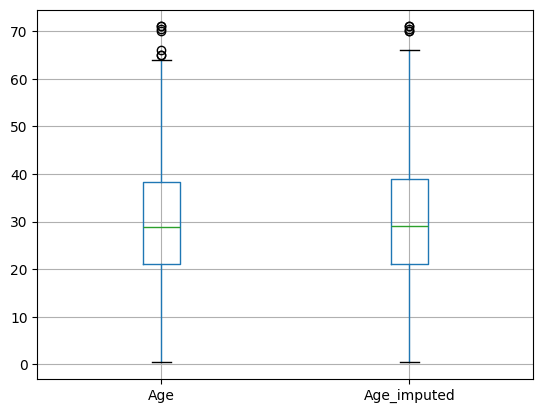

In [27]:
X_train[['Age', 'Age_imputed']].boxplot()

## Use this code in production and follow the random state.
*Use random state because if user give same value but different output for same input so use random state*


`sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))`

In [31]:
data = pd.read_csv('house-price.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [32]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [33]:
X = data
y = data['SalePrice']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [36]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
317,Gd,TA,270000,TA,Gd
538,Fa,TA,158000,TA,Fa
918,TA,TA,238000,TA,TA
500,NaN,TA,113000,TA,NaN
57,NaN,TA,196500,TA,NaN


In [37]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20524\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQua

In [38]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [39]:
temp

,original,imputed
TA,0.951043,0.953767
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [40]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.638608
TA,0.412439,0.551066
Fa,0.040917,0.051627
Po,0.027823,0.038159
Ex,0.024550,0.031425


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20524\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20524\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

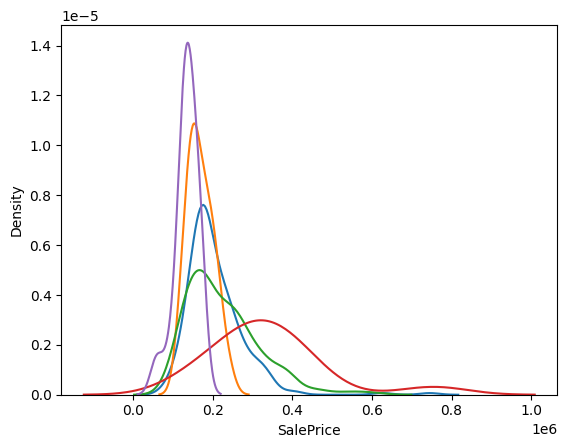

In [41]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20524\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20524\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

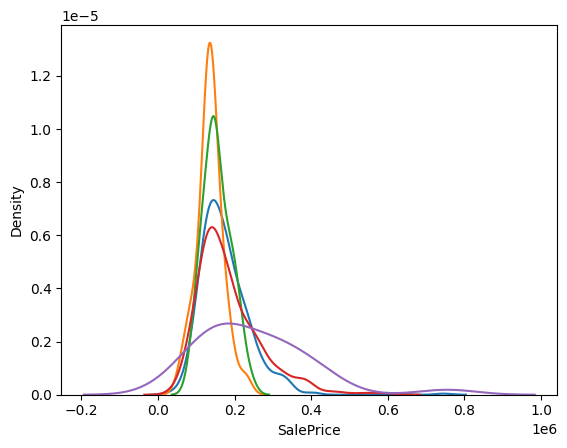

In [42]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()